In [1]:
# import cv2
# import numpy as np
# import random

# import os

# class PuzzlePiece:
#     def __init__(self, x, y, w, h, area):
#         self.x = x
#         self.y = y
#         self.width  = w
#         self.height = h
#         self.area   = area

#         self.color = tuple(map(int, np.random.random(size=3) * 255))

#         self.matched = True
#         self.removed = False

#         self.img = None

#     def get_location(self):
#         return (self.x, self.y)

#     def set_location(self, x, y):
#         self.x = x
#         self.y = y

#     def set_img(self, img):
#         self.img = img

#     def get_color(self):
#         return self.color

#     def __repr__(self):
#         return f"<Puzzle Piece at (x={self.x}, y={self.y}) with color={self.color}>"

#     def matches(self, other):
#         return (self.x - other.x) ** 2 + (self.y - other.y) ** 2 < 4900

#     def is_valid(self):
#         if (self.area < 50**2):
#             return False
#         if (self.width < 60):
#             return False
#         if (self.height < 60):
#             return False
#         return True

#     def is_multiple(self):
#         # Assume valid
#         if self.area > 75**2:
#             return True
#         if self.width > 100 or self.height > 100:
#             return True
#         return False
    
#     def get_bounding_box(self, threshold = 100):
#         contours, hierarchy = cv2.findContours(self.img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#         biggest_contour = max(contours, key = cv2.contourArea)
#         rect = cv2.minAreaRect(biggest_contour)
#         self.box_raw = cv2.boxPoints(rect)
        
#         return self.box_raw
    
#     def get_rotation_to_align(self, box_raw = None):
#         if (box_raw == None):
#             box_raw = self.box_raw
            
#         top_line_vector = box_raw[1] - box_raw[0]
#         top_line_vector = top_line_vector / np.linalg.norm(top_line_vector)
#         return np.arccos(top_line_vector.dot(np.array([1, 0])))
    
    
    
    
# class Detector:
#     def __init__(self):
#         self.piece_centers = list()
#         self.pieces = list()
     

#     def process(self, img):

#         # Filter out background
#         hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#         background_lower = (0, 0, 70)
#         background_upper = (255, 30, 220)
#         binary = cv2.inRange(hsv, background_lower, background_upper)
        
#         # Part of the image which is the puzzle pieces
#         blocks = 255 - binary
        
#         # Remove noise
#         blocks = cv2.dilate(blocks, None, iterations=1)
#         blocks = cv2.erode(blocks, None, iterations=1)
        
#         # Perform 2 iterations of eroding (by distance)
#         piece_centers = blocks
#         for i in range(2):
#             dist_transform = cv2.distanceTransform(piece_centers,cv2.DIST_L2,5)
#             _, piece_centers = cv2.threshold(dist_transform,2,255,0)
#             piece_centers = piece_centers.astype(np.uint8)
    
#         # One more eroding for good measure
#         piece_centers = cv2.erode(piece_centers, None, iterations=4)

#         n, markers, stats, centroids = cv2.connectedComponentsWithStats(piece_centers)
        
#         # Increment so that background is not marked as "unknown"
#         markers = markers + 1
        
#         for i, stat in enumerate(stats):
#             # Background

#             xmin, ymin, width, height, area = tuple(stat)
            
#             # This component is either noise or part of another piece that broke off
#             # Mark its area as "unknown" to be filled by watershed
#             if area < 200:
#                 markers[markers == (i+1)] = 0
        
#         # Mark unknown regions
#         # This is where it's part of a block but we're not sure which one it's part of.
#         unknown = cv2.subtract(blocks, piece_centers)
#         markers[unknown == 255] = 0
        
#         # Convert image to RGB because watershed only works on RGB
#         blobs = cv2.cvtColor(blocks, cv2.COLOR_GRAY2RGB)

#         # Hooray
#         cv2.watershed(blobs, markers)
#         markers = markers.astype(np.uint8)

#         # Outline pieces in original image as blue
# #         img[markers == 255] = (255, 0, 0)

#         #return img, markers
        
#         piece_centers = list()
#         pieces = list()

#         # Unmatch all pieces
#         for piece in self.pieces:
#             piece.matched = False

#         #print(stats)
#         for i, stat in enumerate(stats):
#             # Background
#             if i == 0:
#                 continue
            
#             if i+1 not in markers:
#                 continue
            
#             xmin, ymin, width, height, area = tuple(stat)
#             centroid = tuple(np.array(centroids[i]).astype(np.int32))
#             piece = PuzzlePiece(centroid[0], centroid[1], width, height, area)
#             #if piece.is_valid():
#             if True:
#                 # First try to match the piece
#                 for existing_piece in self.pieces:
#                     if not existing_piece.matched:
#                         if existing_piece.matches(piece):
#                             existing_piece.set_location(centroid[0], centroid[1])
#                             existing_piece.width = width
#                             existing_piece.height = height
#                             existing_piece.matched = True
#                             piece = existing_piece
#                             break
#                 pieces.append(piece)
#                 y_max, x_max = blocks.shape[:2]
#                 cutout_img = img[max(ymin-10,0):min(ymin+height+10, y_max),
#                                     max(xmin-10,0):min(xmin+width+10, x_max)].copy()
# #                 cutout_img = img[ymin:ymin+height, xmin:xmin+height].copy()
#                 piece.set_img(cutout_img)


#         for piece in pieces:
#             r = int(np.sqrt(piece.area) / 4) + 1
#             color = piece.get_color()
#             cv2.circle(img, piece.get_location(), r, color, -1)
#             piece_centers.append(piece.get_location())

#         #markers[res != 0] = 255

#         self.piece_centers = piece_centers
#         self.pieces = pieces

#         return img, markers


In [12]:
import matplotlib.pyplot as plt

In [64]:
import cv2
import numpy as np

class ThomasPuzzlePiece:
    def __init__(self, x, y, w, h, area):
        self.x = x
        self.y = y
        self.width  = w
        self.height = h
        self.area   = area

        self.color = tuple(map(int, np.random.random(size=3) * 255))

        self.matched = True
        self.removed = False

        self.img = None
        self.natural_img = None

    def get_location(self):
        return (self.x, self.y)

    def set_location(self, x, y):
        self.x = x
        self.y = y

    def set_img(self, img):
        self.img = img

    def set_natural_img(self, natural_img):
        self.natural_img = natural_img

    def get_color(self):
        return self.color

    def __repr__(self):
        return f"<Puzzle Piece at (x={self.x}, y={self.y}) with color={self.color}>"

    def matches(self, other):
        return (self.x - other.x) ** 2 + (self.y - other.y) ** 2 < 4900

    def is_valid(self):
        if (self.area < 50**2):
            return False
        if (self.width < 60):
            return False
        if (self.height < 60):
            return False
        return True

    def is_multiple(self):
        # Assume valid
        if self.area > 5000:
            return True
        if self.width > 120 or self.height > 120:
            return True
        return False
    
    def get_bounding_box(self, threshold = 100, erosion = 1, dilation = 1):
        # Compute a contour and then use the largest countour to build a bounding box
        filtered = self.img
        filtered = cv2.dilate(filtered, np.ones((dilation, dilation), np.uint8))
        filtered = cv2.erode(filtered, np.ones((erosion, erosion), np.uint8))
        # import matplotlib.pyplot as plt
        # plt.imshow(filtered)
        # plt.show()
        contours, hierarchy = cv2.findContours(filtered, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        biggest_contour = max(contours, key = cv2.contourArea)
        rect = cv2.minAreaRect(biggest_contour)
        self.box_raw = cv2.boxPoints(rect)
        
        return self.box_raw
    
    def get_rotation_to_align(self, compute_bounding_box = False, box_raw = None):
        # Use the vector of the top of the bounding box to orient the piece. 
        if compute_bounding_box:
            self.get_bounding_box()
        if (box_raw == None):
            box_raw = self.box_raw
            
        top_line_vector = box_raw[1] - box_raw[0]
        top_line_vector = top_line_vector / np.linalg.norm(top_line_vector)
        return np.arccos(top_line_vector.dot(np.array([1, 0])))
    

class ThomasDetector:
    def __init__(self):
        self.piece_centers = list()
        self.pieces = list()
     

    def process(self, img):

        # Filter out background
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        background_lower = (0, 0, 80)
        background_upper = (255, 30, 220)
        binary = cv2.inRange(hsv, background_lower, background_upper)
        
        # Part of the image which is the puzzle pieces
        blocks = 255 - binary
        
        # Remove noise
        blocks = cv2.dilate(blocks, None, iterations=1)
        blocks = cv2.erode(blocks, None, iterations=1)
        
        # Perform 2 iterations of eroding (by distance)
        piece_centers = blocks
        for i in range(2):
            dist_transform = cv2.distanceTransform(piece_centers,cv2.DIST_L2,5)
            _, piece_centers = cv2.threshold(dist_transform,2,255,0)
            piece_centers = piece_centers.astype(np.uint8)
    
        # One more eroding for good measure
        piece_centers = cv2.erode(piece_centers, None, iterations=4)

        n, markers, stats, centroids = cv2.connectedComponentsWithStats(piece_centers)
        
        # Increment so that background is not marked as "unknown"
        markers = markers + 1
        
        for i, stat in enumerate(stats):
            # Background

            xmin, ymin, width, height, area = tuple(stat)
            
            # This component is either noise or part of another piece that broke off
            # Mark its area as "unknown" to be filled by watershed
            if area < 200:
                markers[markers == (i+1)] = 0
        
        # Mark unknown regions
        # This is where it's part of a block but we're not sure which one it's part of.
        unknown = cv2.subtract(blocks, piece_centers)
        markers[unknown == 255] = 0
        
        # Convert image to RGB because watershed only works on RGB
        blobs = cv2.cvtColor(blocks, cv2.COLOR_GRAY2RGB)

        # Hooray
        cv2.watershed(blobs, markers)
        markers = markers.astype(np.uint8)

        # Outline pieces in original image as blue
#         img[markers == 255] = (255, 0, 0)

        #return img, markers
        
        piece_centers = list()
        pieces = list()

        # Unmatch all pieces
        for piece in self.pieces:
            piece.matched = False

        #print(stats)
        for i, stat in enumerate(stats):
            # Background
            if i == 0:
                continue
            
            if i+1 not in markers:
                continue
            
            xmin, ymin, width, height, area = tuple(stat)
            centroid = tuple(np.array(centroids[i]).astype(np.int32))
            piece = ThomasPuzzlePiece(centroid[0], centroid[1], width, height, area)
            #if piece.is_valid():
            if True:
                # First try to match the piece
                for existing_piece in self.pieces:
                    if not existing_piece.matched:
                        if existing_piece.matches(piece):
                            existing_piece.set_location(centroid[0], centroid[1])
                            existing_piece.width = width
                            existing_piece.height = height
                            existing_piece.matched = True
                            piece = existing_piece
                            break
                pieces.append(piece)

                cutout_img = blocks[max(ymin-20,0):ymin+height+20, max(xmin-20,0):xmin+height+20].copy()
                piece.set_img(cutout_img)

                y_max, x_max = blocks.shape[:2]
                cutout_img = img[max(ymin-10,0):min(ymin+height+10, y_max),
                                    max(xmin-10,0):min(xmin+width+10, x_max)].copy()
                piece.set_natural_img(cutout_img)

        for piece in pieces:
            r = int(np.sqrt(piece.area) / 4) + 1
            color = piece.get_color()
            cv2.circle(img, piece.get_location(), r, color, -1)
            piece_centers.append(piece.get_location())

        #markers[res != 0] = 255

        self.piece_centers = piece_centers
        self.pieces = pieces

        return img, markers


In [65]:
from glob import glob
import numpy as np 
import pandas as pd

import cv2

import torch
import torch.nn as nn
from torch.utils import data
import copy

import accountant
import torch.multiprocessing as mp
# from thomas_detector import ThomasDetector
from puzzle_grid import PuzzleGrid, get_xy_min

device = 'cpu'
torch.hub.load('rwightman/gen-efficientnet-pytorch', 'tf_efficientnet_b2_ns', pretrained=True)


        

Using cache found in C:\Users\Thomas/.cache\torch\hub\rwightman_gen-efficientnet-pytorch_master


GenEfficientNet(
  (conv_stem): Conv2dSame(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
  (bn1): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  (act1): SiLU(inplace=True)
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (bn1): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
        (act1): SiLU(inplace=True)
        (se): SqueezeExcite(
          (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
          (act1): SiLU(inplace=True)
          (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
        )
        (conv_pw): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNorm2d(16, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
        (act2): Identity()
      )
      (1): DepthwiseSeparableCon

In [66]:
name = 'efficientnetTune2_epoch8'
model = torch.load('..\\vision\\checkpoints\\'+name+'.cp').eval().to(device)
MODEL_OUT_DIM = 512

In [90]:
def run_model(img, image_size = 150):
    img = cv2.resize(img, (image_size, image_size))
    img = (img - img.mean()) / img.std()
#     img = ((img / 255.0) - np.array([0.485, 0.456, 0.406])) / np.array([0.229, 0.224, 0.225])
    ref = torch.from_numpy(img[:, :, :].reshape(1, image_size, image_size, 3)).float().permute(0, 3, 1, 2).to(device)
    ref_pred = model(ref)
    return ref_pred.cpu().detach().numpy()

def cvt_color(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

class VisionMatcher():
    def __init__(self, base_image_path, width_n = 5, height_n = 4):
        self.base_img = cvt_color(cv2.imread(base_image_path))
        self.detector = ThomasDetector()
        self.detector.process(self.base_img)
        self.pieces = self.detector.pieces
        
        self.width_n = width_n
        self.height_n = height_n
        
        self.puzzle_grid = PuzzleGrid(
            width_n = width_n, height_n = height_n, spacing_height = 1.0/(height_n-1), spacing_width = 1.0/(width_n-1), offset_x = 0, offset_y = 0
            )
        
        self.max_x = np.max([p.x for p in self.pieces])
        self.min_x = np.min([p.x for p in self.pieces])
        self.max_y = np.max([p.y for p in self.pieces])
        self.min_y = np.min([p.y for p in self.pieces])

        self.piece_grid = [[None for j in range(height_n)] for i in range(width_n)]

        def scale_x(x):
            return (x - self.min_x) / (self.max_x - self.min_x)
        def scale_y(y):
            return (y - self.min_y) / (self.max_y - self.min_y)
        print(len(self.pieces))
        for piece in self.pieces:
            if (piece.is_valid()):
                (x_close, y_close) = get_xy_min(((self.puzzle_grid.grid_centers - np.array([scale_x(piece.x), scale_y(piece.y)]))**2).sum(axis = 2))
                self.piece_grid[x_close][y_close] = piece
        
        
        self.inferences = np.zeros((width_n, height_n, MODEL_OUT_DIM))
        
        for row in range(width_n):
            for col in range(height_n):
                piece = self.piece_grid[row][col]
                if(piece == None):
                    print("Missing piece", (row, col))
                else:
                    self.inferences[row, col] = run_model(piece.natural_img)
            
    def calculate_xyrot(self, img):
        sims = np.zeros((self.width_n, self.height_n, 4))
        for k in range(4):
            sims[:, :, k] = ((self.inferences - run_model(np.rot90(img, k = k))) ** 2).sum(axis = 2)
        
#         for k in range(4):
#             sims[:, :, k+4] = ((matcher.inferences - run_model(np.flip(np.rot90(img, k = k), 0))) ** 2).sum(axis = 2)
        
#         for k in range(4):
#             sims[:, :, k+8] = ((matcher.inferences - run_model(np.flip(np.rot90(img, k = k), 1))) ** 2).sum(axis = 2)
                    
        xy_min = get_xy_min(sims[:, :].min(axis = 2) + sims[:, :].mean(axis = 2))
        return xy_min, np.argmin(sims[xy_min[0], xy_min[1], :4])

In [91]:
matcher = VisionMatcher('C:/Code/CS134/HW1/done_exploded_colored2.jpg')

22


((4, 0), 1)


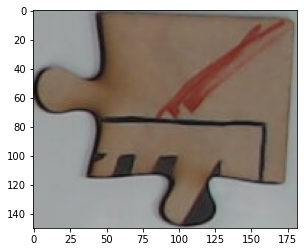

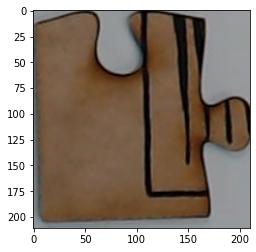

In [99]:
path = '../vision/p10.png'
cors = matcher.calculate_xyrot(cvt_color(cv2.imread(path)))
print(cors)
plt.imshow(matcher.piece_grid[cors[0][0]][cors[0][1]].natural_img)
plt.show()
plt.imshow(np.rot90(cvt_color(cv2.imread(path)), k = cors[1]))
plt.show()

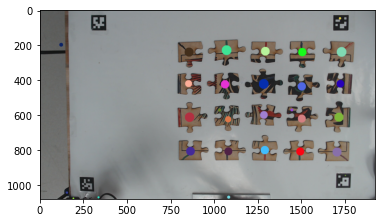

In [77]:
plt.imshow(matcher.base_img)

((0, 3), 3)


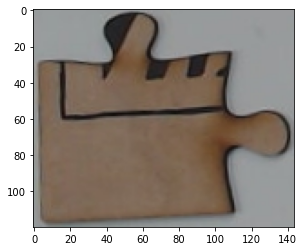

In [10]:
cors = matcher.calculate_xyrot(cvt_color(cv2.imread('../vision/done_exploded2.jpg'))[150:270, 30:170])
print(cors)
plt.imshow(matcher.piece_grid[cors[0][0]][cors[0][1]].img)

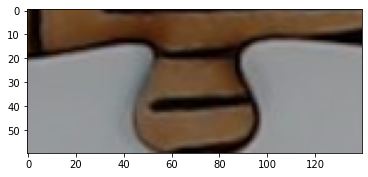

In [11]:
plt.imshow(cvt_color(cv2.imread('../vision/p10.png'))[150:270, 30:170])

In [12]:
from vision.piece_data import get_img_lists

ModuleNotFoundError: No module named 'vision.piece_data'; 'vision' is not a package

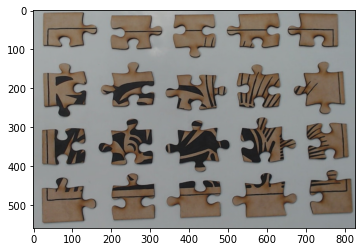

In [638]:
plt.imshow(cvt_color(cv2.imread('../vision/done_exploded2.jpg')))

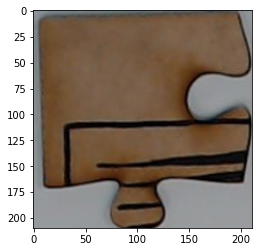

In [639]:
plt.imshow(cvt_color(cv2.imread(path)))